# Creazione di Condizioni iniziali realistiche

L'esercitazione si pone lo scopo di trovare delle condizioni iniziali per analizzare il comportamento idraulico di un terreno realistico sottoposto a precipitazioni reali.

Al terreno che si è analizzato è tale da approssimare un terreno reale descritto nella realazione geotecnica del comune di Arzignano (VI) http://www2.comune.arzignano.vi.it/AmministrazioneTrasparente/6-TERR/Links/PAT%20VAR1/d03_RelazioneGeologica/Relazione_Geologica.pdf

Per descrivere le proprietà idrauliche del terreno si sono usati i parametri gia presenti all'interno del modello whetgeo, portando a delle ovvie ed importanti differenze dal comportamento reale che potrebbe avere il terreno specifico in esame


<figure>
    <img src="Figures/terrenoS7.png" width="600" height="600/1.618">
    <figcaption>Fig.1 - Stratigrafia terreno </figcaption>
<figure>

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.colors as cl 
from matplotlib import rc
import matplotlib.style as style 
from plotly.subplots import make_subplots
from geoframepy.timeseries import io_csv
%matplotlib inline
import plotly.graph_objects as go
import plotly.express as px

import math
import xarray as xr

import warnings
warnings.filterwarnings('ignore')

style.available
style.use('seaborn-whitegrid')

nice_fonts = {
        "legend.frameon": True,
        "legend.fancybox": True,
        "legend.facecolor": "white",
        "axes.edgecolor": "0.8",
        "axes.linewidth": 0.6,
        "grid.linewidth":0.4,
        # Use LaTeX to write all text
        "text.usetex": False,
        "font.family": "serif",
        # Use 10pt font in plots, to match 10pt font in document
        "axes.labelsize": 12,
        "font.size": 12,
        # Make the legend/label fonts a little smaller
        "legend.fontsize": 10,
        "xtick.labelsize": 10,
        "ytick.labelsize": 10,
}

plt.rcParams.update(nice_fonts)


my_cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", ["#ece7f2","#d0d1e6","#a6bddb","#74a9cf","#3690c0","#0570b0","#045a8d","#023858"])
project_path = os.path.dirname(os.getcwd())
os.getcwd()

'C:\\Users\\fredd\\Desktop\\OMS_Project_WHETGEO1D_23\\Jupyter_Notebook'

In [2]:
os.chdir(project_path+'/output')
os.listdir()

['.DS_Store',
 'ex00_0000.nc',
 'exS7_06_0000.nc',
 'exS7_07_0000.nc',
 'exS7_08_0000.nc',
 'exS7_09_0000.nc',
 'ex_II_0000.nc',
 'ex_II_argilla_results_1_0000.nc',
 'ex_II_results_1_0000.nc',
 'Integrate PDE']

In [3]:
ds_ic =ds1 = xr.open_dataset("exS7_06_0000.nc")
rain_ic = io_csv.pandas_read_OMS_timeseries(project_path + '/data/Timeseries/exS7_06_TOP.csv',datetime_index=False)

In [4]:
ds1 = xr.open_dataset("exS7_07_0000.nc")
ds2 = xr.open_dataset("exS7_08_0000.nc")
ds3 = xr.open_dataset("exS7_09_0000.nc")
ds3

<xarray.Dataset>
Dimensions:           (depth: 1051, dualDepth: 1051, time: 742)
Coordinates:
  * depth             (depth) float64 -10.49 -10.48 -10.47 ... -0.015 -0.005 0.0
  * dualDepth         (dualDepth) float64 -10.5 -10.49 -10.48 ... -0.01 0.0
  * time              (time) datetime64[ns] 2023-03-01T01:00:00 ... 2023-03-3...
Data variables:
    psi               (time, depth) float64 ...
    psiIC             (depth) float64 ...
    T                 (depth) float64 ...
    theta             (time, depth) float64 ...
    saturationDegree  (time, depth) float64 ...
    darcyVelocity     (time, dualDepth) float64 ...
    waterVolume       (time, depth) float64 ...
    error             (time) float64 ...
    topBC             (time) float64 ...
    bottomBC          (time) float64 ...
    runOff            (time) float64 ...
    controlVolume     (depth) float64 ...
Attributes:
    Description_of_the_problem:         WHETGEO-1D ex03 wet initial condition.
    Top_boundary_condition:             Top Coupled
    Bottom_boundary_condition:          Bottom Free drainage
    path_top_boundary_condition:        C:\Users\fredd\Desktop\OMS_Project_WH...
    path_bottom_boundary_condition:     C:\Users\fredd\Desktop\OMS_Project_WH...
    path_grid:                          C:\Users\fredd\Desktop\OMS_Project_WH...
    time_delta:                          
    swrc_model:                         {Water Depth,Van Genuchten}
    soil_hydraulic_conductivity_model:  {null,Mualem Van Genuchten}
    interface_conductivity_model:       max

In [5]:
rain1 = io_csv.pandas_read_OMS_timeseries(project_path + '/data/Timeseries/exS7_07_TOP.csv',datetime_index=False)
rain2 = io_csv.pandas_read_OMS_timeseries(project_path + '/data/Timeseries/exS7_08_TOP.csv',datetime_index=False)
rain3 = io_csv.pandas_read_OMS_timeseries(project_path + '/data/Timeseries/exS7_09_TOP.csv',datetime_index=False)

# Simulazione condizioni iniziali

Per trovare delle condizioni iniziali di suzione realistiche per il terreno (pur con le limitazioni di un modello 1D) è stata fatta una simulazione della durata di 2 anni per essere sicuri che l'acqua abbia il tempo necessario per filtrare attraverso tutto lo strato. Le precipitazioni usate sono quelle rilevate dalla stazione di Crespadoro [83] (VI) dal 2021-01-01 al 2022-12-31.

le condizioni iniziali trovate si riferiscono allo stato del terreno al 2022-12-31

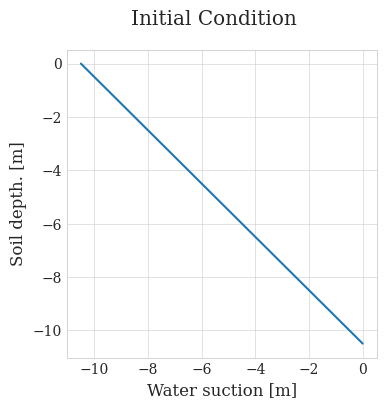

In [6]:
fig, ax = plt.subplots(1,1, figsize= (4,4))
ds_ic.psiIC.plot(y='depth')
plt.xlabel('Water suction [m]')
fig.suptitle('Initial Condition ')
plt.show()

In [ ]:
fig, ax = plt.subplots(nrows=3, ncols=1, figsize=(12, 16)) 
norm1 = matplotlib.colors.Normalize(vmin=np.amin(ds3.psi.values), vmax=np.amax(ds2.psi.values))
norm2 = matplotlib.colors.Normalize(vmin=np.amin(ds3.theta.values), vmax=np.amax(ds2.theta.values))
ax[0].plot(ds_ic.time.values, rain_ic['0'])
ax[0].set_ylabel('Rain [mm]')
ax[0].set_xlim('2021-01-01 00:01','2022-12-31 00:22')
ax[0].set_title('Precipitation [mm]')


ds_ic.psi.plot(ax=ax[1], y='depth', add_colorbar=False, cmap='gist_earth_r', norm=norm1)
ax[1].set_ylabel('Depth [m]')
ax[1].set_xlabel('Time')
ax[1].set_title('Water Suction $\\psi$ [m]')
ax[1].xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
ax[1].xaxis.set_tick_params(rotation=0)

cbar_ax1 = fig.add_axes([0.95, 0.40, 0.02, 0.20])
sm1 = plt.cm.ScalarMappable(cmap='gist_earth_r', norm=norm1)
cbar1 = fig.colorbar(sm1, cax=cbar_ax1)
cbar1.set_label('$\\psi$ [m]', rotation=0, labelpad=22)

ds_ic.theta.plot(ax=ax[2], y='depth', add_colorbar=False, cmap='cividis_r', norm=norm2)
ax[2].set_ylabel('Depth [m]')
ax[2].set_xlabel('Time')
ax[2].set_title('Water Content $\\theta$ [m] ')
ax[2].xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
ax[2].xaxis.set_tick_params(rotation=0)

cbar_ax_ic = fig.add_axes([0.95, 0.13, 0.02, 0.20])
sm_ic = plt.cm.ScalarMappable(cmap='cividis_r', norm=norm2)
cbar_ic = fig.colorbar(sm_ic, cax=cbar_ax_ic)
cbar_ic.set_label('$\\theta$ [m]', rotation=0, labelpad=22)




fig.suptitle("Simulazione da 2021-01-01 a 2022-12-31", fontweight = "bold")
fig.subplots_adjust(top=0.93)
plt.show()

# Applicazione delle condizioni iniziali per studiare gli effetti di differenti tipi di precipitazioni

Utilizzando le condizioni iniziali cosi trovate è possibile studiare il comportamento del terreno soggetto a diversi tipi di precipitazioni.

Si sono analizzate tre archi di tempo di un mese differenti che rappresentano bene tutto lo spettro dell'intensità di pioggia che può colpire un qualsiasi terreno:

    - Precipitazioni rilevate dalla stazione di Crespadoro nel mese di Maggio 2023 (periodo con una piovosita media per la zona)
    - Precipitazioni avvenute nel periodo dell'alluvione del 2023 in Emilia-Romagna (periodo di Maggio 2023)
    - Precipitazioni rilevate dalla stazione di Crespadoro nel mese di Marzo 2023 (periodo secco con poche piogge di modesta 
      intensità)

In [ ]:
fig, ax  = plt.subplots(ncols=3,nrows=1,figsize=(10,4))
ds1.psiIC.plot(y='depth',ax = ax[0])
ds2.psiIC.plot(y='depth',ax = ax[1])
ds3.psiIC.plot(y='depth',ax = ax[2])
ax[0].set_title("IC for Precipitations Crespadoro May 2023", fontsize = 9)
ax[1].set_title("IC for Precipitations Emilia May 2023", fontsize = 9)
ax[2].set_title("IC for Precipitations Crespadoro March 2023", fontsize = 9)
fig.suptitle('Initial Condition', fontweight = "bold")
plt.grid(color='grey', linestyle='-', linewidth=0.3)
plt.tight_layout()

In [ ]:
fig, ax = plt.subplots(nrows=3, ncols=1, figsize=(12, 16)) 
norm1 = matplotlib.colors.Normalize(vmin=np.amin(ds3.psi.values), vmax=np.amax(ds2.psi.values))
norm2 = matplotlib.colors.Normalize(vmin=np.amin(ds3.theta.values), vmax=np.amax(ds2.theta.values))
ax[0].plot(ds1.time.values, rain1['0'])
ax[0].set_ylabel('Rain [mm]')
ax[0].set_xlim('2023-05-01 00:01','2023-05-31 00:22')
ax[0].set_title('Precipitation [mm]')


ds1.psi.plot(ax=ax[1], y='depth', add_colorbar=False, cmap='gist_earth_r', norm=norm1)
ax[1].set_ylabel('Depth [m]')
ax[1].set_xlabel('Time')
ax[1].set_title('Water Suction $\\psi$ [m]')
ax[1].xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
ax[1].xaxis.set_tick_params(rotation=0)

cbar_ax1 = fig.add_axes([0.95, 0.40, 0.02, 0.20])
sm1 = plt.cm.ScalarMappable(cmap='gist_earth_r', norm=norm1)
cbar1 = fig.colorbar(sm1, cax=cbar_ax1)
cbar1.set_label('$\\psi$ [m]', rotation=0, labelpad=22)

ds1.theta.plot(ax=ax[2], y='depth', add_colorbar=False, cmap='cividis_r', norm=norm2)
ax[2].set_ylabel('Depth [m]')
ax[2].set_xlabel('Time')
ax[2].set_title('Water Content $\\theta$ [m] ')
ax[2].xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
ax[2].xaxis.set_tick_params(rotation=0)

cbar_ax2 = fig.add_axes([0.95, 0.13, 0.02, 0.20])
sm2 = plt.cm.ScalarMappable(cmap='cividis_r', norm=norm2)
cbar2 = fig.colorbar(sm2, cax=cbar_ax2)
cbar2.set_label('$\\theta$ [m]', rotation=0, labelpad=22)


fig.suptitle("Precipitations Crespadoro May 2023", fontweight = "bold")
fig.subplots_adjust(top=0.93)

plt.show()

In [ ]:
fig, ax = plt.subplots(nrows=3, ncols=1, figsize=(12, 16))
norm = matplotlib.colors.Normalize(vmin=np.amin(ds3.psi.values), vmax=np.amax(ds2.psi.values))
norm2 = matplotlib.colors.Normalize(vmin=np.amin(ds3.theta.values), vmax=np.amax(ds2.theta.values))

ax[0].plot(ds2.time.values, rain2['0'])
ax[0].set_ylabel('Rain [mm]')
ax[0].set_xlabel('Time')
ax[0].set_xlim('2023-05-01 00:01','2023-05-31 00:22')
ax[0].set_title('Precipitation [mm]')

ds2.psi.plot(ax=ax[1], y='depth', add_colorbar=False, cmap='gist_earth_r', norm=norm)
ax[1].set_ylabel('Depth [m]')
ax[1].set_xlabel('Time')
ax[1].set_title('Water Suction $\\psi$ [m]')
ax[1].xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
ax[1].xaxis.set_tick_params(rotation=0)

cbar_ax1 = fig.add_axes([0.95, 0.40, 0.02, 0.20])
sm1 = plt.cm.ScalarMappable(cmap='gist_earth_r', norm=norm1)
cbar1 = fig.colorbar(sm1, cax=cbar_ax1)
cbar1.set_label('$\\psi$ [m]', rotation=0, labelpad=22)

ds2.theta.plot(ax=ax[2], y='depth', add_colorbar=False, cmap='cividis_r', norm=norm2)
ax[2].set_ylabel('Depth [m]')
ax[2].set_xlabel('Time')
ax[2].set_title('Water Content $\\theta$ [m] ')
ax[2].xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
ax[2].xaxis.set_tick_params(rotation=0)

cbar_ax2 = fig.add_axes([0.95, 0.13, 0.02, 0.20])
sm2 = plt.cm.ScalarMappable(cmap='cividis_r', norm=norm2)
cbar2 = fig.colorbar(sm2, cax=cbar_ax2)
cbar2.set_label('$\\theta$ [m]', rotation=0, labelpad=22)

fig.suptitle("Precipitations Emilia May 2023",fontweight = "bold")
fig.subplots_adjust(top=0.93)
plt.show()

In [ ]:
fig, ax = plt.subplots(nrows=3, ncols=1, figsize=(12, 16))
norm = matplotlib.colors.Normalize(vmin=np.amin(ds3.psi.values), vmax=np.amax(ds2.psi.values))
norm2 = matplotlib.colors.Normalize(vmin=np.amin(ds3.theta.values), vmax=np.amax(ds2.theta.values))

ax[0].plot(ds3.time.values, rain3['0'])
ax[0].set_ylabel('Rain [mm]')
ax[0].set_xlabel('Time')
ax[0].set_xlim('2023-03-01 00:01','2023-03-31 00:22')
ax[0].set_title('Precipitation [mm]')

ds3.psi.plot(ax=ax[1], y='depth', add_colorbar=False, cmap='gist_earth_r', norm=norm)
ax[1].set_ylabel('Depth [m]')
ax[1].set_xlabel('Time')
ax[1].set_title('Water Suction $\\psi$ [m]')
ax[1].xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
ax[1].xaxis.set_tick_params(rotation=0)

cbar_ax1 = fig.add_axes([0.95, 0.40, 0.02, 0.20])
sm1 = plt.cm.ScalarMappable(cmap='gist_earth_r', norm=norm1)
cbar1 = fig.colorbar(sm1, cax=cbar_ax1)
cbar1.set_label('$\\psi$ [m]', rotation=0, labelpad=22)

ds3.theta.plot(ax=ax[2], y='depth', add_colorbar=False, cmap='cividis_r', norm=norm2)
ax[2].set_ylabel('Depth [m]')
ax[2].set_xlabel('Time')
ax[2].set_title('Water Content $\\theta$ [m] ')
ax[2].xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
ax[2].xaxis.set_tick_params(rotation=0)

cbar_ax2 = fig.add_axes([0.95, 0.13, 0.02, 0.20])
sm2 = plt.cm.ScalarMappable(cmap='cividis_r', norm=norm2)
cbar2 = fig.colorbar(sm2, cax=cbar_ax2)
cbar2.set_label('$\\theta$ [m]', rotation=0, labelpad=22)

fig.suptitle("Precipitations Crespadoro March 2023", fontweight = "bold")
fig.subplots_adjust(top=0.93)
plt.show()

In [ ]:
fig, ax = plt.subplots(ncols =3, nrows= 1, figsize=(13, 5))

ds1.error.plot(ax=ax[0], linewidth=1.8, color='darkred')
ax[0].set_xlabel('Time')
ax[0].set_ylabel('Volume error at each time step [m]', fontsize = 9) 
ax[0].set_title('Error over time without clay layer \n  Crespadoro May 2023',fontsize = 9, fontweight = 'bold')
ax[0].grid(color='grey', linestyle='-', linewidth=0.3)
ax[0].set_ylim(-3.5e-11,3e-11)

ds2.error.plot(ax=ax[1], linewidth=1.8, color='darkred')
ax[1].set_xlabel('Time')
ax[1].set_ylabel('Volume error at each time step [m]', fontsize = 9) 
ax[1].set_title('Error over time with clay layer \n  Emilia March 2023', fontsize = 9, fontweight = 'bold')
ax[1].grid(color='grey', linestyle='-', linewidth=0.3)
ax[1].set_ylim(-3.5e-11,3e-11)


ds3.error.plot(ax=ax[2], linewidth=1.8, color='darkred')
ax[2].set_xlabel('Time')
ax[2].set_ylabel('Volume error at each time step [m]', fontsize = 9) 
ax[2].set_title('Error over time with clay layer \n  Crespadoro March 2023', fontsize = 9, fontweight = 'bold')
ax[2].grid(color='grey', linestyle='-', linewidth=0.3)
ax[2].set_ylim(-3.5e-11,3e-11)


plt.tight_layout()
plt.show()

In [ ]:
myDepth = [-1,-2,-6,-8]
colors = ["orange","red","blue","green"]

fig = make_subplots(rows=2, cols=3, subplot_titles=('Water suction [m] <br> Crespadoro May 2023','Water suction [m] <br>Emilia March 2023','Water suction [m] <br> Crespadoro March 2023',
                                                    'Water content [-] <br> Crespadoro May 2023','Water content [-] <br> Emilia May 2023','Water content [-] <br> Crespadoro March 2023'),
                    horizontal_spacing=0.1)
for i in range (0,len(myDepth)):
    fig.add_trace(go.Scatter(x=ds1.time.values[:], y=ds1.psi.sel(depth=myDepth[i], method='nearest', time=ds1.time.values[:]),
                             mode='lines', name=str(myDepth[i])+' m',marker_color = colors[i]), row=1, col=1)
    

    fig.add_trace(go.Scatter(x=ds2.time.values[:], y=ds2.psi.sel(depth=myDepth[i], method='nearest', time=ds2.time.values[:]),
                             mode='lines', name=str(myDepth[i])+' m',marker_color = colors[i], 
                             showlegend=False ), row=1, col=2)

    fig.add_trace(go.Scatter(x=ds3.time.values[:], y=ds3.psi.sel(depth=myDepth[i], method='nearest', time=ds3.time.values[:]),
                             mode='lines', name=str(myDepth[i])+' m',marker_color = colors[i], 
                             showlegend=False ), row=1, col=3, )

for i in range (0,len(myDepth)):
    fig.add_trace(go.Scatter(x=ds1.time.values[:], y=ds1.theta.sel(depth=myDepth[i], method='nearest', time=ds1.time.values[:]),
                             mode='lines', name=str(myDepth[i])+' m',marker_color = colors[i],
                             showlegend=False), row=2, col=1)
    

    fig.add_trace(go.Scatter(x=ds2.time.values[:], y=ds2.theta.sel(depth=myDepth[i], method='nearest', time=ds2.time.values[:]),
                             mode='lines', name=str(myDepth[i])+' m',marker_color = colors[i], 
                             showlegend=False ), row=2, col=2)

    fig.add_trace(go.Scatter(x=ds3.time.values[:], y=ds3.theta.sel(depth=myDepth[i], method='nearest', time=ds3.time.values[:]),
                             mode='lines', name=str(myDepth[i])+' m',marker_color = colors[i], 
                             showlegend=False ), row=2, col=3, )

    
fig.update_layout(autosize=False,width=1000,height=800)
fig.update_yaxes(title_text="$\\Psi [m]$", row=1, col=1, range= [-0.7,0.6])
fig.update_yaxes(title_text="$\\Psi [m]$", row=1, col=2, range= [-0.7,0.6])
fig.update_yaxes(title_text="$\\Psi [m]$", row=1, col=3, range= [-0.7,0.6])
fig.update_yaxes(title_text="$\\theta [-]$", row=2, col=1, range= [0.0,0.5])
fig.update_yaxes(title_text="$\\theta [-]$", row=2, col=2, range= [0.0,0.5])
fig.update_yaxes(title_text="$\\theta [-]$", row=2, col=3, range= [0.0,0.5])

fig.show(renderer="svg")


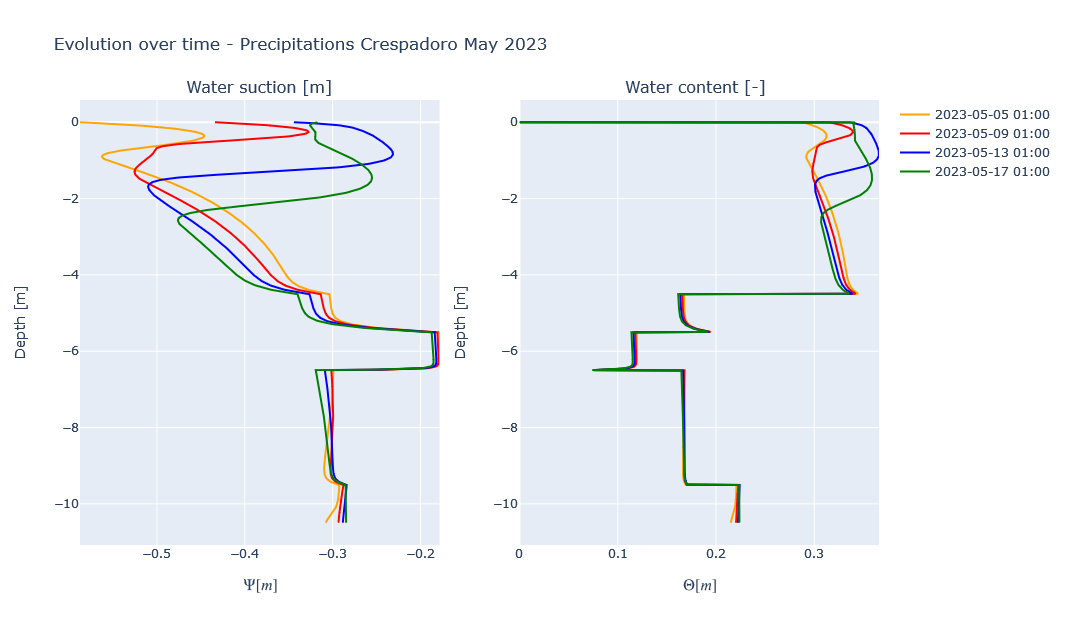

In [15]:
ds1Date = ['2023-05-05 01:00','2023-05-09 01:00','2023-05-13 01:00','2023-05-17 01:00']

fig =make_subplots(1,2, subplot_titles=('Water suction [m]','Water content [-] '))
for i in range (0,len(myDepth)):
    fig.add_trace(go.Scatter(x=ds1.psi.sel(time=ds1Date[i]),  y=ds1.depth,
                             mode='lines',marker_color = colors[i], showlegend = True,name = ds1Date[i]), row=1, col=1)
    fig.add_trace(go.Scatter(x=ds1.theta.sel(time=ds1Date[i]),  y=ds1.depth,
                             mode='lines',marker_color = colors[i], showlegend = False,name = ds1Date[i]), row=1, col=2)

fig.update_layout(title= 'Evolution over time - Precipitations Crespadoro May 2023')
fig.update_layout(autosize=False,width=900,height=625)
fig.update_xaxes(title_text="$\\Psi [m]$", row=1, col=1)
fig.update_yaxes(title_text="Depth [m]", row=1, col=1)
fig.update_xaxes(title_text="$\\Theta [m]$", row=1, col=2)
fig.update_yaxes(title_text="Depth [m]", row=1, col=2)


#fig.update_layout(xaxis_title="$\\Psi [m]$", yaxis_title= "$Depth [m]$")
fig.show()


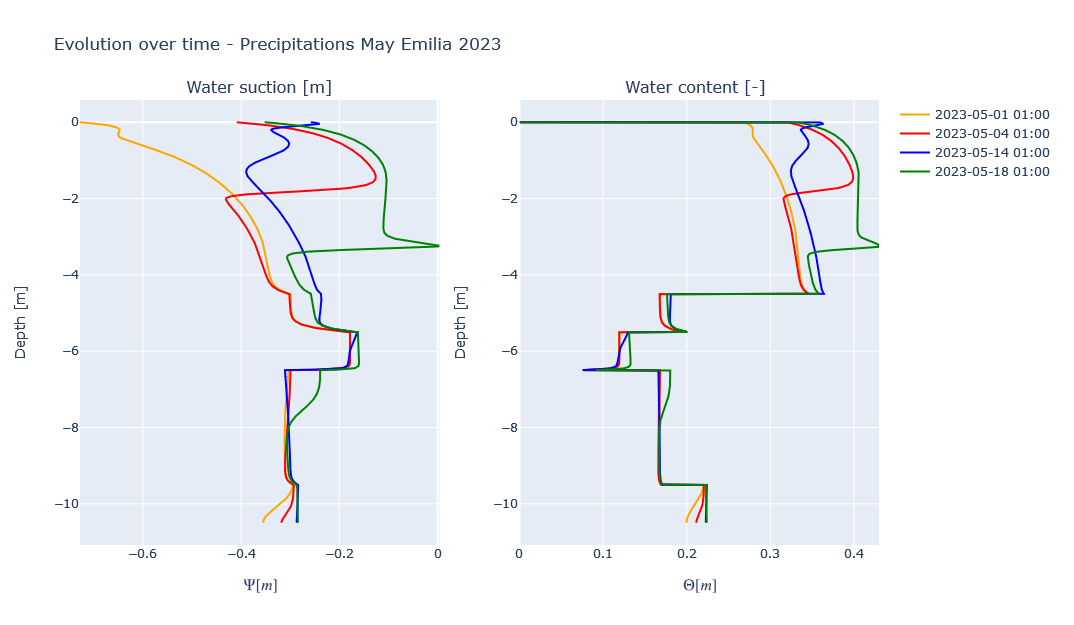

In [16]:
ds2Date = ['2023-05-01 01:00','2023-05-04 01:00','2023-05-14 01:00','2023-05-18 01:00']

fig =make_subplots(1,2, subplot_titles=('Water suction [m]','Water content [-] '))
for i in range (0,len(myDepth)):
    fig.add_trace(go.Scatter(x=ds2.psi.sel(time=ds2Date[i]),  y=ds2.depth,
                             mode='lines',marker_color = colors[i], showlegend = True,name = ds2Date[i]), row=1, col=1)
    fig.add_trace(go.Scatter(x=ds2.theta.sel(time=ds2Date[i]),  y=ds2.depth,
                             mode='lines',marker_color = colors[i], showlegend = False,name = ds2Date[i]), row=1, col=2)

fig.update_layout(title= 'Evolution over time - Precipitations May Emilia 2023')
fig.update_layout(autosize=False,width=900,height=625)
fig.update_xaxes(title_text="$\\Psi [m]$", row=1, col=1)
fig.update_yaxes(title_text="Depth [m]", row=1, col=1)
fig.update_xaxes(title_text="$\\Theta [m]$", row=1, col=2)
fig.update_yaxes(title_text="Depth [m]", row=1, col=2)


#fig.update_layout(xaxis_title="$\\Psi [m]$", yaxis_title= "$Depth [m]$")
fig.show()


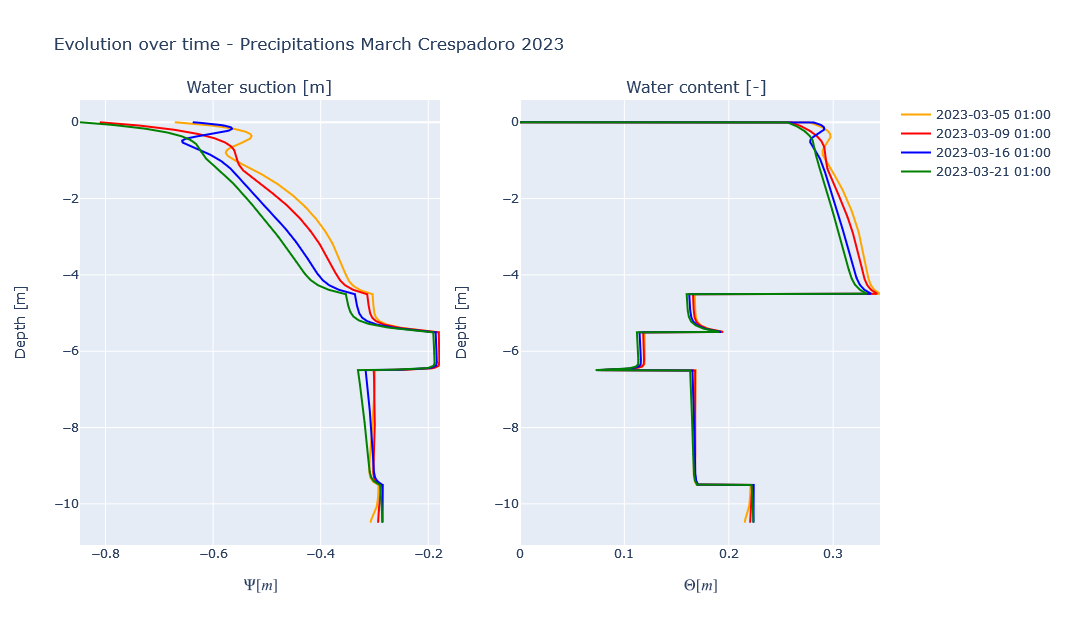

In [17]:

ds3Date = ['2023-03-05 01:00','2023-03-09 01:00','2023-03-16 01:00','2023-03-21 01:00']
fig =make_subplots(1,2, subplot_titles=('Water suction [m]','Water content [-] '))
for i in range (0,len(myDepth)):
    fig.add_trace(go.Scatter(x=ds3.psi.sel(time=ds3Date[i]),  y=ds3.depth,
                             mode='lines',marker_color = colors[i], showlegend = True,name = ds3Date[i]), row=1, col=1)
    fig.add_trace(go.Scatter(x=ds3.theta.sel(time=ds3Date[i]),  y=ds3.depth,
                             mode='lines',marker_color = colors[i], showlegend = False,name = ds3Date[i]), row=1, col=2)

fig.update_layout(title= 'Evolution over time - Precipitations March Crespadoro 2023')
fig.update_layout(autosize=False,width=1000,height=625)
fig.update_xaxes(title_text="$\\Psi [m]$", row=1, col=1)
fig.update_yaxes(title_text="Depth [m]", row=1, col=1)
fig.update_xaxes(title_text="$\\Theta [m]$", row=1, col=2)
fig.update_yaxes(title_text="Depth [m]", row=1, col=2)


#fig.update_layout(xaxis_title="$\\Psi [m]$", yaxis_title= "$Depth [m]$")
fig.show()